In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from copy import deepcopy
from scipy.stats import iqr

In [3]:
red = pd.read_csv("./data/winequality-red1.csv")
#red.head()

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Feature Engineering

## Korrelationen

In [6]:
redcopy = deepcopy(red)
redcopy.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Multiplikationen

In [7]:
redcopy["free x total sulfur dioxide"] = redcopy["free sulfur dioxide"] * redcopy["total sulfur dioxide"]
redcopy["fixed acidity x citric acid"] = redcopy["fixed acidity"] * redcopy["citric acid"]
redcopy["fixed acidity x density"] = redcopy["fixed acidity"] * redcopy["density"]
redcopy["fixed acidity x pH"] = redcopy["fixed acidity"] * redcopy["pH"]
redcopy["volatile acidity x citric acid"] = redcopy["volatile acidity"] * redcopy["citric acid"]
redcopy["citric acid x pH"] = redcopy["citric acid"] * redcopy["pH"]
redcopy["alcohol x density"] = redcopy["alcohol"] * redcopy["density"]
redcopy["fixed acidity x residual sugar"] = redcopy["fixed acidity"] * redcopy["residual sugar"]


redcopy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free x total sulfur dioxide,fixed acidity x citric acid,fixed acidity x density,fixed acidity x pH,volatile acidity x citric acid,citric acid x pH,alcohol x density,fixed acidity x residual sugar
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,374.0,0.000,7.38372,25.974,0.0000,0.0000,9.37932,14.06
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1675.0,0.000,7.77504,24.960,0.0000,0.0000,9.76864,20.28
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,810.0,0.312,7.77660,25.428,0.0304,0.1304,9.77060,17.94
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1020.0,6.272,11.17760,35.392,0.1568,1.7696,9.78040,21.28
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,374.0,0.000,7.38372,25.974,0.0000,0.0000,9.37932,14.06


### Potenzen

In [8]:
redcopy["free sulfur dioxide^2"] = redcopy["free sulfur dioxide"] * redcopy["free sulfur dioxide"]
redcopy["total sulfur dioxide^2"] = redcopy["total sulfur dioxide"] * redcopy["total sulfur dioxide"]
redcopy["fixed acidity^2"] = redcopy["fixed acidity"] * redcopy["fixed acidity"]
redcopy["citric acid^2"] = redcopy["citric acid"] * redcopy["citric acid"]
redcopy["density^2"] = redcopy["density"] * redcopy["density"]
redcopy["pH^2"] = redcopy["pH"] * redcopy["pH"]
redcopy["volatile acidity^2"] = redcopy["volatile acidity"] * redcopy["volatile acidity"]
redcopy["alcohol^2"] = redcopy["alcohol"] * redcopy["alcohol"]
redcopy["residual sugar^2"] = redcopy["residual sugar"] * redcopy["residual sugar"]


redcopy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,fixed acidity x residual sugar,free sulfur dioxide^2,total sulfur dioxide^2,fixed acidity^2,citric acid^2,density^2,pH^2,volatile acidity^2,alcohol^2,residual sugar^2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,14.06,121.0,1156.0,54.76,0.0000,0.995605,12.3201,0.4900,88.36,3.61
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,20.28,625.0,4489.0,60.84,0.0000,0.993610,10.2400,0.7744,96.04,6.76
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,17.94,225.0,2916.0,60.84,0.0016,0.994009,10.6276,0.5776,96.04,5.29
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,21.28,289.0,3600.0,125.44,0.3136,0.996004,9.9856,0.0784,96.04,3.61
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,14.06,121.0,1156.0,54.76,0.0000,0.995605,12.3201,0.4900,88.36,3.61


In [9]:
redcopy.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,fixed acidity x residual sugar,free sulfur dioxide^2,total sulfur dioxide^2,fixed acidity^2,citric acid^2,density^2,pH^2,volatile acidity^2,alcohol^2,residual sugar^2
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,...,0.452050,-0.114568,-0.086749,0.990417,0.664465,0.668288,-0.679656,-0.224831,-0.065424,0.059598
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,...,-0.078096,-0.022074,0.053345,-0.251180,-0.468623,0.021908,0.236757,0.969388,-0.202158,-0.021618
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,...,0.348343,-0.038300,0.069310,0.659421,0.946907,0.365134,-0.538816,-0.493442,0.109805,0.104110
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,...,0.915461,0.260991,0.228816,0.118612,0.149985,0.355689,-0.087369,-0.004455,0.044808,0.932447
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,...,0.086433,0.025121,0.020133,0.075877,0.254741,0.200523,-0.259485,0.048722,-0.215949,0.066529
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,...,0.104951,0.939255,0.527010,-0.153192,-0.085353,-0.021817,0.069658,-0.022607,-0.067689,0.199179
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,...,0.124683,0.574853,0.918286,-0.119416,-0.022639,0.071372,-0.065065,0.053507,-0.196408,0.178774
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,...,0.548787,0.008155,0.025346,0.651662,0.366629,0.999999,-0.342166,-0.000287,-0.499882,0.276593
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,...,-0.299383,0.041306,-0.107194,-0.650003,-0.503729,-0.341726,0.999257,0.227913,0.204721,-0.070824
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,...,0.077023,0.037428,0.019237,0.180537,0.314741,0.148537,-0.188343,-0.248202,0.093237,0.002040


## Abstände vom Mittelwert

In [10]:
red_mean = deepcopy(red)

In [11]:
red_mean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
red_mean["fixed acidity mean"] =  abs(red_mean["fixed acidity"] - red_mean["fixed acidity"].mean())
red_mean["volatile acidity mean"] =  abs(red_mean["volatile acidity"] - red_mean["volatile acidity"].mean())
red_mean["citric acid mean"] =  abs(red_mean["citric acid"] - red_mean["citric acid"].mean())
red_mean["residual sugar mean"] =  abs(red_mean["residual sugar"] - red_mean["residual sugar"].mean())
red_mean["chlorides mean"] =  abs(red_mean["chlorides"] - red_mean["chlorides"].mean())
red_mean["free sulfur dioxide mean"] =  abs(red_mean["free sulfur dioxide"] - red_mean["free sulfur dioxide"].mean())
red_mean["total sulfur dioxide mean"] =  abs(red_mean["total sulfur dioxide"] - red_mean["total sulfur dioxide"].mean())
red_mean["density mean"] =  abs(red_mean["density"] - red_mean["density"].mean())
red_mean["pH mean"] =  abs(red_mean["pH"] - red_mean["pH"].mean())
red_mean["sulphates mean"] =  abs(red_mean["sulphates"] - red_mean["sulphates"].mean())
red_mean["alcohol mean"] =  abs(red_mean["alcohol"] - red_mean["alcohol"].mean())

In [13]:
red_mean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile acidity mean,citric acid mean,residual sugar mean,chlorides mean,free sulfur dioxide mean,total sulfur dioxide mean,density mean,pH mean,sulphates mean,alcohol mean
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.172179,0.270976,0.638806,0.011467,4.874922,12.467792,0.001053,0.198887,0.098149,1.022983
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.352179,0.270976,0.061194,0.010533,9.125078,20.532208,0.000053,0.111113,0.021851,0.622983
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.232179,0.230976,0.238806,0.004533,0.874922,7.532208,0.000253,0.051113,0.008149,0.622983
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.247821,0.289024,0.638806,0.012467,1.125078,13.532208,0.001253,0.151113,0.078149,0.622983
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.172179,0.270976,0.638806,0.011467,4.874922,12.467792,0.001053,0.198887,0.098149,1.022983


In [14]:
red_mean.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,volatile acidity mean,citric acid mean,residual sugar mean,chlorides mean,free sulfur dioxide mean,total sulfur dioxide mean,density mean,pH mean,sulphates mean,alcohol mean
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,...,0.035683,0.237529,-0.000956,-0.031758,0.039287,-0.039219,0.192642,0.047184,0.035725,-0.088682
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,...,0.237773,0.029609,-0.015193,-0.009424,-0.059940,0.054552,-0.092200,0.084831,-0.022909,-0.102361
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,...,0.033911,0.171620,0.070470,0.176406,0.066390,0.087576,0.144535,0.027243,0.113900,0.076279
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,...,-0.014526,0.046203,0.871903,0.005923,0.249006,0.199270,0.219844,-0.037427,-0.026088,0.056115
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,...,-0.035667,0.159333,0.059166,0.872814,0.013908,-0.006819,-0.091321,0.117198,0.388037,-0.019155
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,...,-0.046137,-0.124593,0.177384,0.006573,0.530355,0.180931,0.055788,-0.006583,0.052835,-0.022063
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,...,-0.066510,-0.232999,0.157340,0.003517,0.221901,0.602031,0.015295,0.012812,0.121176,0.023297
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,...,-0.072755,0.119299,0.181313,-0.042288,0.055344,-0.014426,0.030530,-0.003068,0.005460,-0.311966
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,...,0.051705,-0.049448,-0.058419,-0.175505,-0.063232,-0.140805,-0.009336,0.060254,-0.258029,0.065174
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,...,-0.038837,0.093545,0.006273,0.404169,0.006266,-0.024902,0.021115,0.181373,0.622959,0.025422


In [15]:
red_mean[red_mean["quality"]==8].mean()

fixed acidity                 8.566667
volatile acidity              0.423333
citric acid                   0.391111
residual sugar                2.577778
chlorides                     0.068444
free sulfur dioxide          13.277778
total sulfur dioxide         33.444444
density                       0.995212
pH                            3.267222
sulphates                     0.767778
alcohol                      12.094444
quality                       8.000000
fixed acidity mean            1.733333
volatile acidity mean         0.156567
citric acid mean              0.195014
residual sugar mean           0.846269
chlorides mean                0.019022
free sulfur dioxide mean      9.333299
total sulfur dioxide mean    25.593218
density mean                  0.002237
pH mean                       0.163149
sulphates mean                0.114567
alcohol mean                  1.787680
dtype: float64

## Binning

In [16]:
red_binned = deepcopy(red)

In [17]:
red_binned["fixed acidity"].quantile(0.25)-1.5*iqr(red_binned["fixed acidity"])

3.95

In [18]:
fixed_acidity = []

for i in red_binned["fixed acidity"]:
    if i < red_binned["fixed acidity"].quantile(0.25)-1.5*iqr(red_binned["fixed acidity"]):
        i = 0
    else:
        if i > red_binned["fixed acidity"].quantile(0.75)+1.5*iqr(red_binned["fixed acidity"]):
                i = 0
        else: i = 1

                
    fixed_acidity.append(i)
    
fa = pd.DataFrame(fixed_acidity)

In [19]:
red_binned["fixed acidity edited"] = fa
red_binned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity edited
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [20]:
pd.crosstab(red_binned["fixed acidity edited"], red_binned["quality"])

quality,3,4,5,6,7,8
fixed acidity edited,,,,,,
0,0,1,15,22,10,1
1,10,52,666,616,189,17


In [21]:
sulfur_dioxide = []

for i in red_binned["total sulfur dioxide"]:
    if i > red_binned["total sulfur dioxide"].quantile(0.95):
        i = 0
    else:
        i = 1

                
    sulfur_dioxide.append(i)
    
fa = pd.DataFrame(sulfur_dioxide)

In [22]:
red_binned["sulfur dioxide edited"] = ca
red_binned.head()

NameError: name 'ca' is not defined

In [23]:
pd.crosstab(red_binned["sulfur dioxide edited"], red_binned["quality"])

KeyError: 'sulfur dioxide edited'

In [24]:
red_binned.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity edited
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.969356
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.172406
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [483]:
red_binned["total sulfur dioxide"].quantile(0.95)

112.09999999999991

In [501]:
red_binned[red_binned["fixed acidity"]>=red_binned["fixed acidity"].quantile(0.75)+1.5*iqr(red_binned["fixed acidity"])].count()

fixed acidity           49
volatile acidity        49
citric acid             49
residual sugar          49
chlorides               49
free sulfur dioxide     49
total sulfur dioxide    49
density                 49
pH                      49
sulphates               49
alcohol                 49
quality                 49
fixed acidity edited    49
dtype: int64

### Choosing data


In [25]:
data_normal = deepcopy(red)
label_normal = data_normal.pop("quality")

In [26]:
label_normal.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [28]:
data_multiplied = deepcopy(redcopy)
label_multiplied = data_multiplied.pop("quality")

In [29]:
data_mean = deepcopy(red_mean)
label_mean = data_mean.pop("quality")

In [30]:
data_class = deepcopy(red)

conditions = [(data_class['quality'] <= 4),
              (data_class['quality'] >= 8)]
choices = ['1 - low', '3 - high']
data_class['quality class'] = np.select(conditions, choices, default = '2 - middle')


label_class = data_class.pop("quality")
label_class = data_class.pop("quality class")

In [58]:
label_class.head()

0    2 - middle
1    2 - middle
2    2 - middle
3    2 - middle
4    2 - middle
Name: quality class, dtype: object

## Naive Bayes

In [64]:
from sklearn.model_selection import train_test_split  
train_data, test_data, train_label, test_label = train_test_split(data_normal, label_normal, test_size=0.20)

In [65]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(train_data, train_label)

In [66]:
prediction_test = model.predict(test_data)

print(np.mean(prediction_test == test_label))   

0.534375


In [67]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(test_label, prediction_test))  
print(classification_report(test_label, prediction_test)) 

[[ 1  0  1  0  0  0]
 [ 1  0  6  5  0  0]
 [ 2  7 91 32  3  0]
 [ 0  3 43 66 21  1]
 [ 0  0  6 13 13  1]
 [ 0  0  0  2  2  0]]
             precision    recall  f1-score   support

          3       0.25      0.50      0.33         2
          4       0.00      0.00      0.00        12
          5       0.62      0.67      0.65       135
          6       0.56      0.49      0.52       134
          7       0.33      0.39      0.36        33
          8       0.00      0.00      0.00         4

avg / total       0.53      0.53      0.53       320



Erkenntnisse: 
- Naive Bayes benötigt keine Normalisierung, die Ergebnisse bleiben gleich

### Feature experiments: Correlation multiplications

In [390]:
from sklearn.model_selection import train_test_split  
train_data1, test_data1, train_label1, test_label1 = train_test_split(data_multiplied, label_multiplied, test_size=0.10)

In [391]:
from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB().fit(train_data1, train_label1)

In [392]:
prediction_test1 = model1.predict(test_data1)

print(np.mean(prediction_test1 == test_label1))   

0.5625


In [393]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(test_label1, prediction_test1))  
print(classification_report(test_label1, prediction_test1)) 

[[ 0  1  0  1  0  0]
 [ 0  1  1  0  0  0]
 [ 1  6 49  9  1  0]
 [ 1  3 15 35  1  7]
 [ 0  1  1 11  5  7]
 [ 0  0  0  2  1  0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.08      0.50      0.14         2
          5       0.74      0.74      0.74        66
          6       0.60      0.56      0.58        62
          7       0.62      0.20      0.30        25
          8       0.00      0.00      0.00         3

avg / total       0.64      0.56      0.58       160



Um sagen zu können, ob der Classifier mit ausgewählten features besser funktioniert, müsste man die selben test, sowie trainingsdaten verwenden --> Nochmal probieren

### Feature experiments: Distance from mean

In [354]:
from sklearn.model_selection import train_test_split  
train_data2, test_data2, train_label2, test_label2 = train_test_split(data_mean, label_mean, test_size=0.10)

In [355]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB().fit(train_data2, train_label2)

In [356]:
prediction_test2 = model2.predict(test_data2)

print(np.mean(prediction_test2 == test_label2))   

0.48125


In [357]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(test_label2, prediction_test2))  
print(classification_report(test_label2, prediction_test2)) 

[[ 1  0  0  0  0  0]
 [ 1  0  2  2  0  0]
 [ 0  4 31 21  4  0]
 [ 1  6 13 36  5  4]
 [ 0  0  2 11  9  3]
 [ 0  0  0  0  4  0]]
             precision    recall  f1-score   support

          3       0.33      1.00      0.50         1
          4       0.00      0.00      0.00         5
          5       0.65      0.52      0.57        60
          6       0.51      0.55      0.53        65
          7       0.41      0.36      0.38        25
          8       0.00      0.00      0.00         4

avg / total       0.52      0.48      0.49       160



## With other classes

In [29]:
from sklearn.model_selection import train_test_split  
train_data3, test_data3, train_label3, test_label3 = train_test_split(data_class, label_class, test_size=0.20)

In [30]:
from sklearn.naive_bayes import GaussianNB

model3 = GaussianNB().fit(train_data3, train_label3)

In [31]:
prediction_test3 = model3.predict(test_data3)

print(np.mean(prediction_test3 == test_label3))   

0.8875


In [32]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(test_label3, prediction_test3))  
print(classification_report(test_label3, prediction_test3)) 

[[  0  13   0]
 [ 11 284   9]
 [  0   3   0]]
             precision    recall  f1-score   support

    1 - low       0.00      0.00      0.00        13
 2 - middle       0.95      0.93      0.94       304
   3 - high       0.00      0.00      0.00         3

avg / total       0.90      0.89      0.89       320



## Stratified k-fold Cross-Validation

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.cross_validation import KFold, cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def confusion_matrix_report(y_true, y_pred):    
    cm, labels = confusion_matrix(y_true, y_pred), unique_labels(y_true, y_pred)
    column_width = max([len(str(x)) for x in labels] + [5])  # 5 is value length
    report = " " * column_width + " " + "{:_^{}}".format("Prediction", column_width * len(labels))+ "\n"
    report += " " * column_width + " ".join(["{:>{}}".format(label, column_width) for label in labels]) + "\n"
    for i, label1 in enumerate(labels):
        report += "{:>{}}".format(label1, column_width) + " ".join(["{:{}d}".format(cm[i, j], column_width) for j in range(len(labels))]) + "\n"
    return report

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [101]:
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
prediction_val = cross_val_predict(model, data_normal, label_normal, cv=10)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

      __________Prediction__________
         3     4     5     6     7     8
    3    0     4     4     2     0     0
    4    2     5    30    14     1     1
    5    4    32   444   178    23     0
    6    0    22   188   315   109     4
    7    0     1    11    79   105     3
    8    0     0     0     6    12     0

0.5434646654158849
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        10
          4       0.08      0.09      0.09        53
          5       0.66      0.65      0.65       681
          6       0.53      0.49      0.51       638
          7       0.42      0.53      0.47       199
          8       0.00      0.00      0.00        18

avg / total       0.55      0.54      0.54      1599



In [34]:
k_fold = KFold(len(label_normal), shuffle=True, random_state=0)
clf = GaussianNB()

prediction_val = cross_val_predict(clf, data_normal, label_normal, cv=k_fold, n_jobs=1)

print(confusion_matrix_report(label_normal, prediction_val))
print(accuracy_score(label_normal, prediction_val))
print(classification_report(label_normal, prediction_val))

      __________Prediction__________
         3     4     5     6     7     8
    3    2     1     6     1     0     0
    4    2     7    26    17     1     0
    5    7    27   451   168    27     1
    6    2    26   180   315   105    10
    7    1     2    15    73   100     8
    8    0     0     0     5    12     1

0.5478424015009381
             precision    recall  f1-score   support

          3       0.14      0.20      0.17        10
          4       0.11      0.13      0.12        53
          5       0.67      0.66      0.66       681
          6       0.54      0.49      0.52       638
          7       0.41      0.50      0.45       199
          8       0.05      0.06      0.05        18

avg / total       0.56      0.55      0.55      1599



red.info()

## Removing outliers

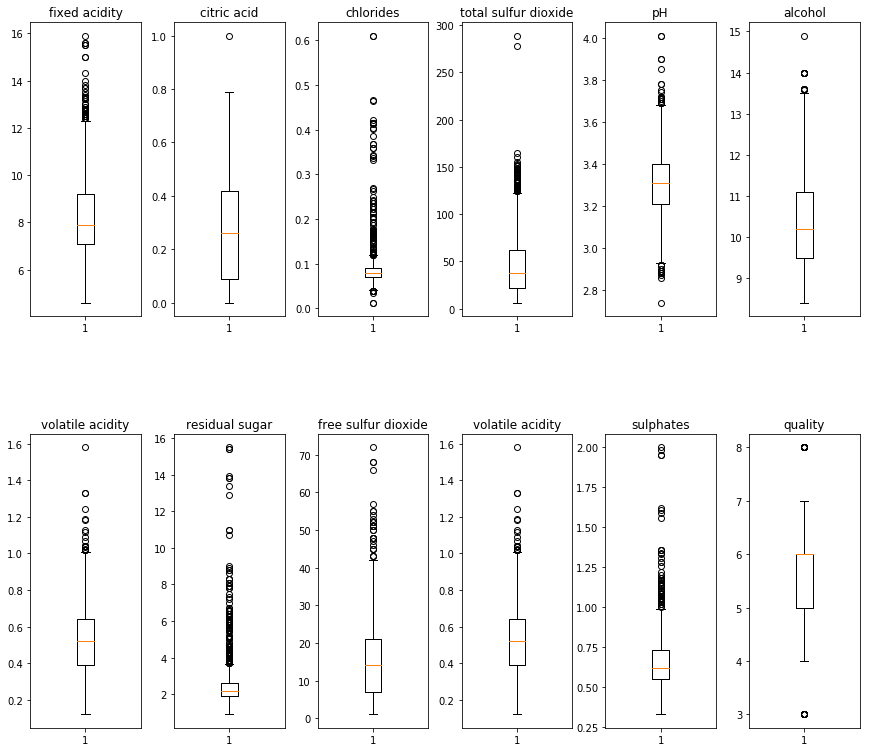

In [5]:
fig, axs = plt.subplots(2,6)

# fixed acidity
axs[0, 0].boxplot(red["fixed acidity"])
axs[0, 0].set_title('fixed acidity')

# volatile acidity
axs[1, 0].boxplot(red["volatile acidity"])
axs[1, 0].set_title('volatile acidity')

# citric acid
axs[0, 1].boxplot(red["citric acid"])
axs[0, 1].set_title('citric acid')

# residual sugar
axs[1, 1].boxplot(red["residual sugar"])
axs[1, 1].set_title("residual sugar")

# chlorides
axs[0, 2].boxplot(red["chlorides"])
axs[0, 2].set_title('chlorides')

# free sulfur dioxide
axs[1, 2].boxplot(red["free sulfur dioxide"])
axs[1, 2].set_title('free sulfur dioxide')

# total sulfur dioxide
axs[0, 3].boxplot(red["total sulfur dioxide"])
axs[0, 3].set_title('total sulfur dioxide')

# density
axs[1, 3].boxplot(red["volatile acidity"])
axs[1, 3].set_title('volatile acidity')

# pH
axs[0, 4].boxplot(red["pH"])
axs[0, 4].set_title('pH')

# sulphates
axs[1, 4].boxplot(red["sulphates"])
axs[1, 4].set_title("sulphates")

# alcohol
axs[0, 5].boxplot(red["alcohol"])
axs[0, 5].set_title('alcohol')

# quality
axs[1, 5].boxplot(red["quality"])
axs[1, 5].set_title('quality')

fig.subplots_adjust(left=0.08, right=2, bottom=0.05, top=2.5,
                    hspace=0.4, wspace=0.3)

plt.show()

In [6]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [73]:
red_out = deepcopy(red)

In [74]:
numbers = []
for i in range(0, 1599):
    numbers.append(i)

attributes = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]


In [50]:
attributes = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
count = 0
for i, j in attributes and j in numbers:
    if red_out["{}".format(i)][j] > 1.5*(red_out["{}".format(i)].quantile(0.75) - (red_out["{}".format(i)].quantile(0.25))):
        print(red_out["{}".format(i)][j])
            #red_out.pop(["{}".format(i)][j])

TypeError: 'bool' object is not iterable

In [72]:
for i in numbers:
    if red_out["fixed acidity"][i] > red_out["fixed acidity"].quantile(0.75) + ((red_out["fixed acidity"].quantile(0.75) - red_out["fixed acidity"].quantile(0.25)) * 1.5):
        red_out["fixed acidity"][i].delete()

AttributeError: 'numpy.float64' object has no attribute 'delete'

In [83]:
for i in numbers:
    if red_out["fixed acidity"][i] > red_out["fixed acidity"].quantile(0.75) + ((red_out["fixed acidity"].quantile(0.75) - red_out["fixed acidity"].quantile(0.25)) * 1.5):
        red_out["fixed acidity"] == 999

In [18]:
red_out["fixed acidity"][0]

7.4

In [10]:
attributes = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]


In [84]:
red_out.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [79]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
